# Feature Engineering

### Inputs

### Outputs

### Objectives

------------------

Get current directory

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/concrete-strength/jupyter_notebooks'

Change current directory to parent directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/concrete-strength'

-------------------------

## Load dataset with target feature of concrete strength dropped

In [4]:
import pandas as pd
df_train = pd.read_csv("outputs/datasets/cleaned/TrainSetCleaned.csv").drop(['csMPa'], axis=1)
df_train.head(3)

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age
0,480.0,0.0,0.0,192.0,0.0,936.0,721.0,28
1,375.0,0.0,0.0,186.0,0.0,1038.0,758.0,28
2,303.6,139.9,0.0,213.5,6.2,895.5,722.5,28


In [5]:
df_test = pd.read_csv("outputs/datasets/cleaned/TestSetCleaned.csv")
df_test.head(3)

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,500.0,0.0,0.0,200.0,0.0,1125.0,613.0,3,26.06
1,122.6,183.9,0.0,203.5,0.0,958.2,800.1,7,10.35
2,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,79.30


Transformations

In [6]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import pingouin as pg 
from feature_engine import transformation as vt

In [7]:
def calculate_skewness_and_kurtosis(df, col):
    skewness = df[col].skew()
    kurtosis = df[col].kurtosis()
    print(f'Skewness: {skewness}, Kurtosis: {kurtosis}')

def distributions(df):
    for col in df.columns:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        sns.histplot(data=df, x=col, kde=True, ax=axes[0])
        pg.qqplot(df[col], dist='norm', ax=axes[1])
        plt.show()
        calculate_skewness_and_kurtosis(df, col)

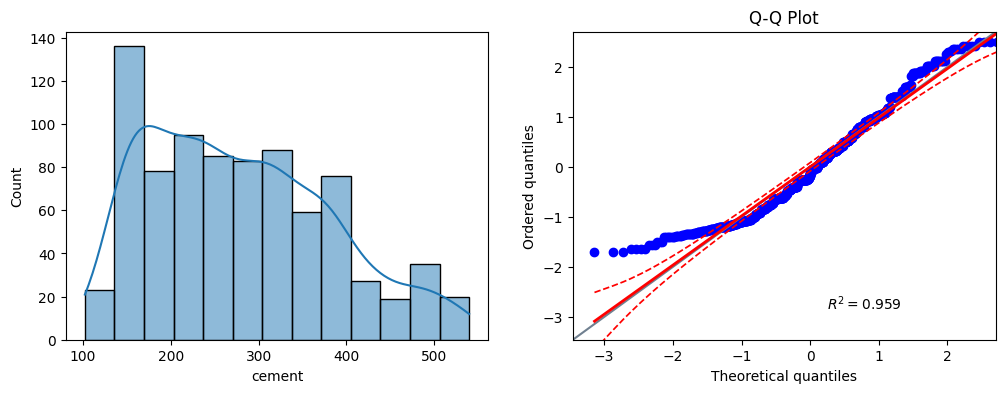

Skewness: 0.5104507965724165, Kurtosis: -0.5518832728776086


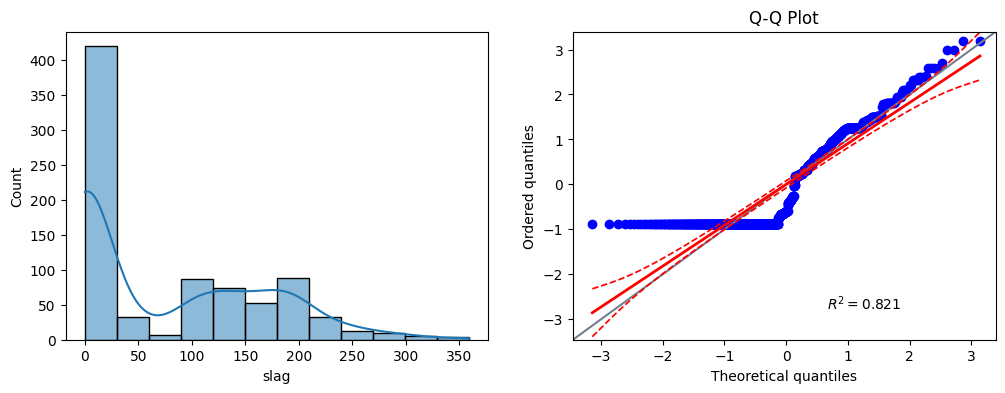

Skewness: 0.725334885469053, Kurtosis: -0.6596135219233679


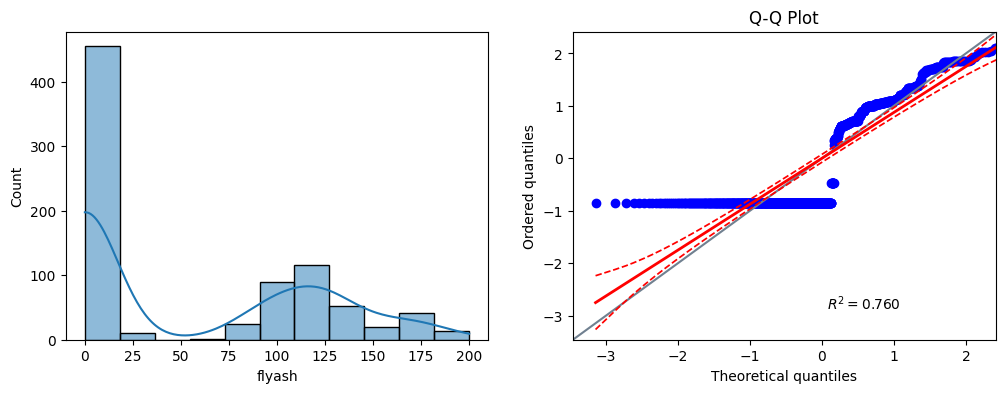

Skewness: 0.5293627914753628, Kurtosis: -1.3545055014100893


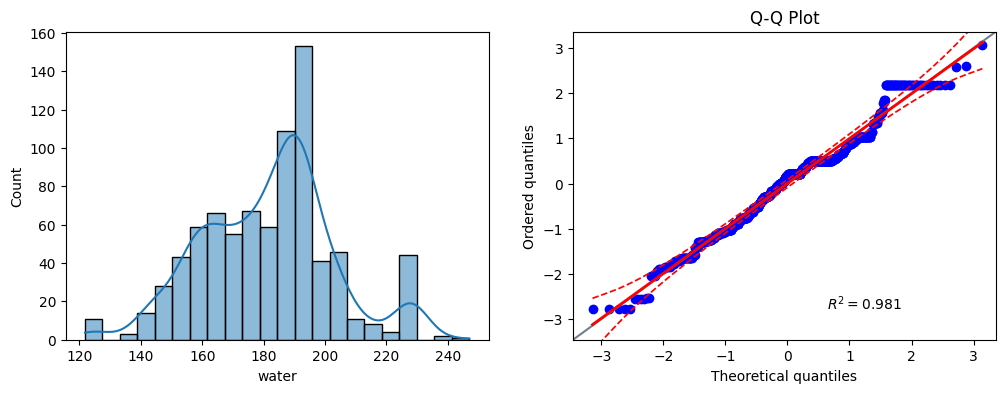

Skewness: 0.04733959276732766, Kurtosis: 0.14708007813422652


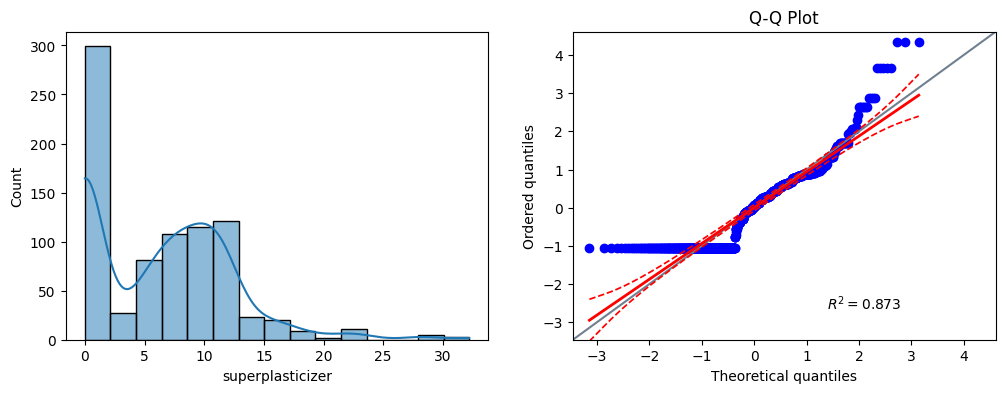

Skewness: 0.8611138983389793, Kurtosis: 1.2252078857870936


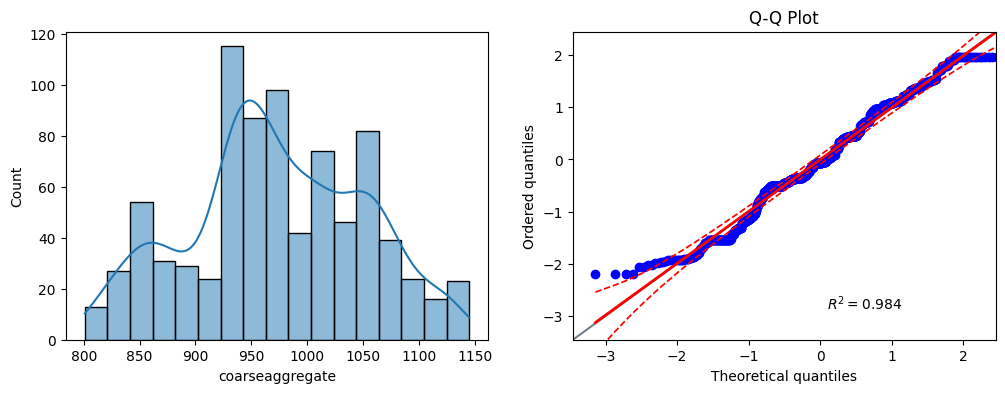

Skewness: -0.03830018148365835, Kurtosis: -0.6304885644013183


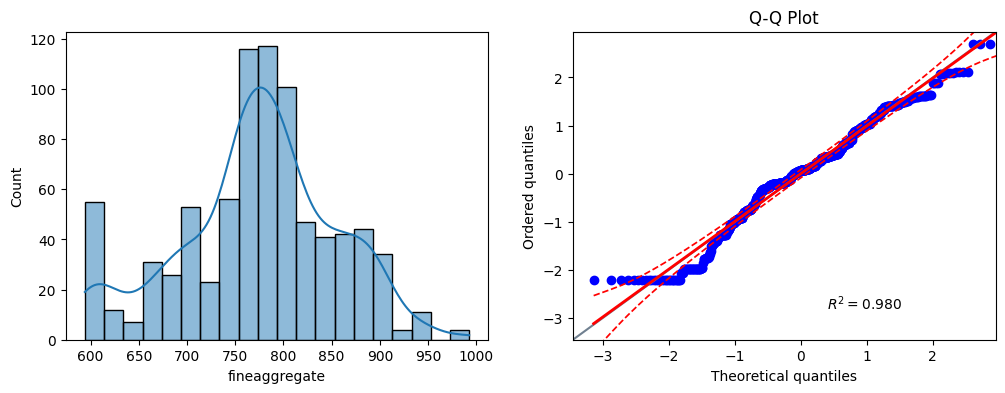

Skewness: -0.24424282188402904, Kurtosis: -0.10365703318996511


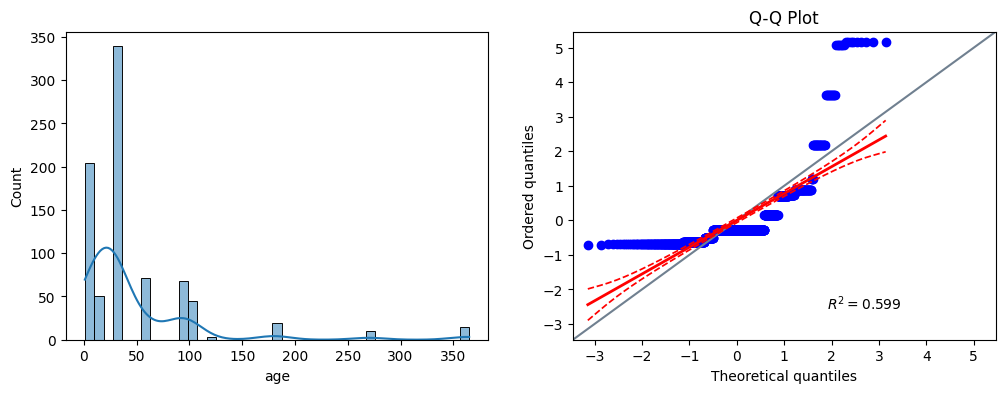

Skewness: 3.270907493725208, Kurtosis: 12.474928319877996


In [8]:
distributions(df_train)

Numerical Variable Transformations - Log transformer, power transformer, reciprocal transformer, Box Cox, Yeo Johnson

Add 1 to all cells to allow for numerical transformations

In [8]:
df_plus_one = df_train.apply(lambda x : x+1)
df_plus_one.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age
0,481.0,1.0,1.0,193.0,1.0,937.0,722.0,29
1,376.0,1.0,1.0,187.0,1.0,1039.0,759.0,29
2,304.6,140.9,1.0,214.5,7.2,896.5,723.5,29
3,252.4,1.0,119.3,189.5,7.4,1029.4,758.7,4
4,501.0,1.0,1.0,201.0,1.0,1126.0,614.0,91


Apply transformations

In [9]:
def feature_engineering_methods(df, transformers): 
    for col in df.columns:
        skew_dict = {}
        kurtosis_dict = {}
        col_dataframe = df[col].to_frame()
        for transformer in transformers:
            col_feat_eng = transformer.fit_transform(col_dataframe)
            skew = col_feat_eng.skew(axis=0)
            kurtosis = col_feat_eng.kurtosis(axis=0)
            skew_dict.update({transformer: skew[col]})
            kurtosis_dict.update({transformer: kurtosis[col]})
            
        best_skew = min(skew_dict.values(), key=abs) 
        best_kurtosis = min(kurtosis_dict.values(), key=abs) 
        skew_key = list(skew_dict.keys())[list(skew_dict.values()).index(best_skew)]
        kurtosis_key = list(kurtosis_dict.keys())[list(kurtosis_dict.values()).index(best_kurtosis)]
        print(f'Transformer with best skewness value for {col}: {skew_key} - {best_skew}')
        print(f'Transformer with best kurtosis value for {col}: {kurtosis_key}- {best_kurtosis}')
        # could try and add function that returns average of skew + kurtosis values for each transformer



In [10]:
transformers_list = ((
    vt.LogTransformer(),
    vt.LogTransformer(base="10"),
    vt.PowerTransformer(),
    vt.ReciprocalTransformer(),
    vt.BoxCoxTransformer(),
    vt.YeoJohnsonTransformer()
    ))


feature_engineering_methods(df = df_plus_one, transformers = transformers_list)

Transformer with best skewness value for cement: YeoJohnsonTransformer() - -0.0171531841873936
Transformer with best kurtosis value for cement: ReciprocalTransformer()- -0.05978819451211548
Transformer with best skewness value for slag: YeoJohnsonTransformer() - -0.03099676412335462
Transformer with best kurtosis value for slag: PowerTransformer()- -1.5982245351160398
Transformer with best skewness value for flyash: ReciprocalTransformer() - -0.2104362667566852
Transformer with best kurtosis value for flyash: PowerTransformer()- -1.7713408698365216
Transformer with best skewness value for water: YeoJohnsonTransformer() - 0.00450328080311972
Transformer with best kurtosis value for water: YeoJohnsonTransformer()- 0.14638386490430122
Transformer with best skewness value for superplasticizer: PowerTransformer() - 0.03125536040233042
Transformer with best kurtosis value for superplasticizer: PowerTransformer()- -1.1088572922516315
Transformer with best skewness value for coarseaggregate: Y

/workspace/.pyenv_mirror/user/current/lib/python3.8/site-packages/feature_engine/transformation/reciprocal.py:135: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.loc[:, self.variables_] = X.loc[:, self.variables_].astype("float")


Apply chosen transformer to each variable:
Cement: Yeo-Johnson
Slag: Yeo-Johnson
Water: Yeo-Johnson
Superplasticiser: Power
Fly ash: Reciprocal
Coarse aggregate: Yeo-Johnson
Fine aggregate: Yeo-Johnson
Age: Box-Cox

In [33]:

#apply appropriate transformer to each column in df_plus_one
#add applied transformer to empty engineered 
yjt = vt.YeoJohnsonTransformer()
bct = vt.BoxCoxTransformer()
pt = vt.PowerTransformer()
rt = vt.ReciprocalTransformer()
df_engineering = pd.DataFrame(columns=['cement', 'slag', 'flyash', 'water', 
'superplasticizer', 'coarseaggregate', 'fineaggregate', 'age'])
yjt_variables = ['cement', 'slag', 'water', 'coarseaggregate', 'fineaggregate']
for var in yjt_variables:
    transformed = yjt.fit_transform(df_plus_one[var].to_numpy().reshape(-1, 1))
    df_engineering[var] = transformed
rt_transformed = rt.fit_transform(df_plus_one['flyash'].to_numpy().reshape(-1, 1))
df_engineering['flyash'] = rt_transformed
pt_transformed = pt.fit_transform(df_plus_one['superplasticizer'].to_numpy().reshape(-1, 1))
df_engineering['superplasticizer'] = pt_transformed
bct_transformed = bct.fit_transform(df_plus_one['age'].to_numpy().reshape(-1, 1))
df_engineering['age'] = bct_transformed
print(df_engineering.shape)
df_engineering.head()




(824, 8)


,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age
0,10.083308,0.698912,1.000000,119.308050,1.000000,1859.591102,74065.950376,3.461989
1,9.483185,0.698912,1.000000,115.999523,1.000000,2086.779165,80994.570422,3.461989
2,8.987288,5.260016,1.000000,131.071191,2.683282,1770.160564,74341.507912,3.461989
3,8.557683,0.698912,0.008382,117.379509,2.720294,2065.282127,80937.293504,1.402170
4,10.184724,0.698912,1.000000,123.701476,1.000000,2282.625099,55427.133259,4.681869


Smart correlated selection

In [27]:
from feature_engine.selection import SmartCorrelatedSelection
corr_sel = SmartCorrelatedSelection(variables=None, method="spearman", threshold=0.6, selection_method="variance")
df_engineering_copy = df_engineering.copy()


corr_sel.fit_transform(df_engineering_copy)
corr_sel.correlated_feature_sets_

[{'superplasticizer', 'water'}]

In [28]:
corr_sel.features_to_drop_

['superplasticizer']

In [37]:
df_complete = df_engineering.drop('superplasticizer', axis=1)
print(df_complete.shape)
df_complete.head()

(824, 7)


,cement,slag,flyash,water,coarseaggregate,fineaggregate,age
0,10.083308,0.698912,1.000000,119.308050,1859.591102,74065.950376,3.461989
1,9.483185,0.698912,1.000000,115.999523,2086.779165,80994.570422,3.461989
2,8.987288,5.260016,1.000000,131.071191,1770.160564,74341.507912,3.461989
3,8.557683,0.698912,0.008382,117.379509,2065.282127,80937.293504,1.402170
4,10.184724,0.698912,1.000000,123.701476,2282.625099,55427.133259,4.681869
